In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

from topological_memory_clustering import *

import time

In [2]:
def bbox(vals, ax):
    # Create cubic bounding box to simulate equal aspect ratio
    max_range = np.array([vals[:,0].max()-vals[:,0].min(), vals[:,1].max()-vals[:,1].min(), vals[:,2].max()-vals[:,2].min()]).max()
    Xb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][0].flatten() + 0.5*(vals[:,0].max()+vals[:,0].min())
    Yb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][1].flatten() + 0.5*(vals[:,1].max()+vals[:,1].min())
    Zb = 0.5*max_range*np.mgrid[-1:2:2,-1:2:2,-1:2:2][2].flatten() + 0.5*(vals[:,2].max()+vals[:,2].min())
    # Comment or uncomment following both lines to test the fake bounding box:
    for xb, yb, zb in zip(Xb, Yb, Zb):
        ax.plot([xb], [yb], [zb], 'w')

In [3]:
vscale = 1.0/20.0
def f11(t):
    return np.array([t, (1-np.cos(t*np.pi*4))*0.5, np.ones_like(t)*vscale, 2*np.pi*np.sin(t*np.pi*4)*vscale]).transpose()
def f12(t):
    return np.array([t, (1-np.cos(t*np.pi*4))*-0.5, np.ones_like(t)*vscale, -2*np.pi*np.sin(t*np.pi*4)*vscale]).transpose()

def f21(t):
    x1 = np.array([t, (1-np.cos(t*np.pi*4))*0.5, np.ones_like(t)*vscale, 2*np.pi*np.sin(t*np.pi*4)*vscale]).transpose()
    x2 = np.array([t, np.sin(t*np.pi*2), np.ones_like(t)*vscale, 2*np.pi*np.cos(t*np.pi*2)*vscale]).transpose()
    l = np.logical_and(t>0.25, t<0.75)
    x1[t>0.5,1] = -x1[t>0.5,1]
    x1[t>0.5,3] = -x1[t>0.5,3]
    x1[l] = x2[l]
    return x1
def f22(t):
    x1 = np.array([t, (1-np.cos(t*np.pi*4))*-0.5, np.ones_like(t)*vscale, -2*np.pi*np.sin(t*np.pi*4)*vscale]).transpose()
    x2 = np.array([t, -np.sin(t*np.pi*2), np.ones_like(t)*vscale, -2*np.pi*np.cos(t*np.pi*2)*vscale]).transpose()
    l = np.logical_and(t>0.25, t<0.75)
    x1[t>0.5,1] = -x1[t>0.5,1]
    x1[t>0.5,3] = -x1[t>0.5,3]
    x1[l] = x2[l]
    return x1

t = np.linspace(0,1,100)
x11 = f11(t)
x12 = f12(t)
x21 = f21(t)
x22 = f22(t)

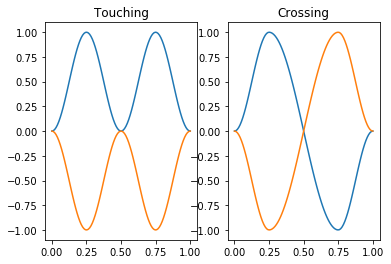

In [4]:
fig = plt.figure()
ax = fig.add_subplot(121)
ax.title.set_text('Touching')
ax.plot(x11[:,0], x11[:,1])
ax.plot(x12[:,0], x12[:,1])

ax = fig.add_subplot(122)
ax.title.set_text('Crossing')
ax.plot(x21[:,0], x21[:,1])
ax.plot(x22[:,0], x22[:,1])
plt.show()

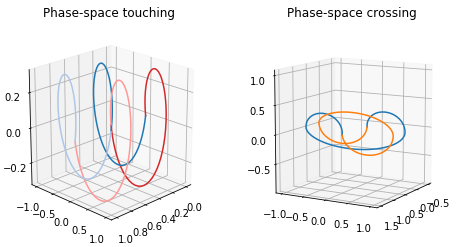

In [5]:
fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(121, projection='3d')
ax.title.set_text("Phase-space touching")
ax.plot(x11[0:51,0], x11[0:51,1], x11[0:51,3], color=plt.cm.tab20(6))
ax.plot(x12[0:51,0], x12[0:51,1], x12[0:51,3], color=plt.cm.tab20(0))
ax.plot(x11[50:,0], x11[50:,1], x11[50:,3], color=plt.cm.tab20(7))
ax.plot(x12[50:,0], x12[50:,1], x12[50:,3], color=plt.cm.tab20(1))
ax.view_init(elev=20., azim=45)

ax = fig.add_subplot(122, projection='3d')
ax.title.set_text("Phase-space crossing")
ax.plot(x21[:,0], x21[:,1], x21[:,3])
ax.plot(x22[:,0], x22[:,1], x22[:,3])
bbox(np.vstack([x21,x22]), ax)
ax.view_init(elev=10., azim=30)
plt.show()

In [6]:
t = np.linspace(0,1,30)
x11 = f11(t)
x12 = f12(t)
x21 = f21(t)
x22 = f22(t)
demos = np.array([x11, x12])
result1, D = homology.compute_homology_filtration(demos, debug=True)

demos = np.array([x21, x22])
result2, D = homology.compute_homology_filtration(demos, debug=True)

Distance computation time: 0.0003237724304199219
Trajectory distance modification time: 6.198883056640625e-06
[Dense] Elapsed Time: 0.00644 seconds, 1193 Edges added
Distance computation time: 0.00033020973205566406
Trajectory distance modification time: 4.76837158203125e-06
[Dense] Elapsed Time: 0.00221 seconds, 1045 Edges added


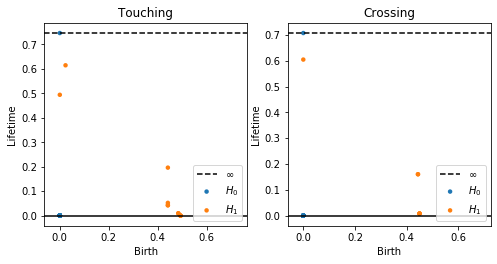

In [7]:
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.title("Touching")
plot_diagrams(result1['dgms'], show=False, lifetime=True)

plt.subplot(122)
plt.title("Crossing")
plot_diagrams(result2['dgms'], show=False, lifetime=True)
plt.show()